In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio

import datetime


In [27]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

# confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confirmed_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confDF = pd.read_csv(confirmed_URL)

# global_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
global_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalDF = pd.read_csv(global_URL)

# death_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_deaths_US.csv')
deathsUS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deathDF = pd.read_csv(deathsUS_URL)

deathsGlobal_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deathGlobalDF = pd.read_csv(deathsGlobal_URL)
# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

In [28]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

deathStateDF = deathDF.groupby('Province_State').sum()

deathStateDF = deathStateDF.loc[states]

In [29]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]

#add South Korea and Italy
temp = globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,5:]
temp = temp.append(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,5:])
temp = temp.append(globalDF[globalDF.index==223].iloc[:,5:])
temp = temp.rename(index={143 : 'South Korea', 137 : 'Italy', 223 : 'United Kingdom'})
dfData = dfData.append(temp)


dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()
labels.append('South Korea')
labels.append('Italy')
labels.append('United Kingdom')

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1

# dfDiff.to_csv('diff.csv')
# dfData.to_csv('state.csv')

In [30]:

for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.5, y+0.5, lab, fontsize=11)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 1000000)
    plt.ylim(1, 100000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [31]:

img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[27:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=.7)

reading files...
saving gif...


------------------------------------------------------------------------

below this line in progress

In [32]:
globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose()

,137
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
3/29/20,97689
3/30/20,101739
3/31/20,105792
4/1/20,110574


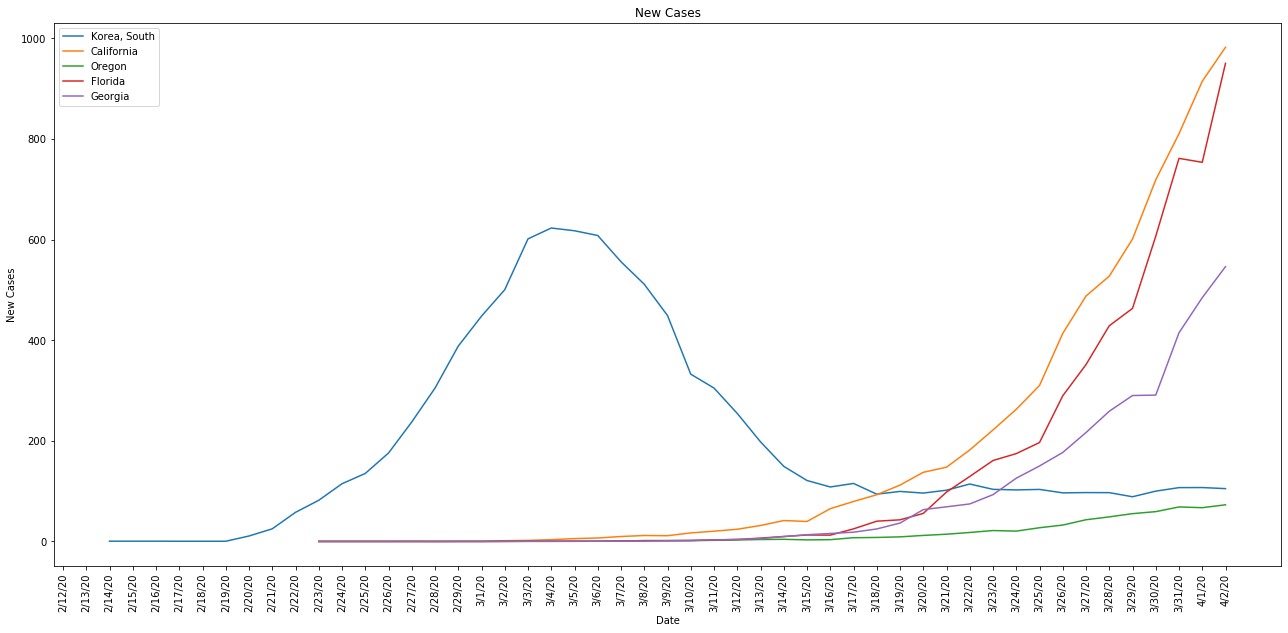

In [33]:

plt.figure(figsize=(22, 10))

# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

plt.plot(globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Korea, South')
# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')


plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='California')
# plt.plot(byStateDF[byStateDF.index=='New York'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New York')
plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Oregon')
plt.plot(byStateDF[byStateDF.index=='Florida'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Florida')
plt.plot(byStateDF[byStateDF.index=='Georgia'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Georgia')
# plt.plot(byStateDF[byStateDF.index=='Mississippi'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Mississippi')
# plt.plot(byStateDF[byStateDF.index=='Louisiana'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Louisiana')
# plt.plot(byStateDF[byStateDF.index=='Massachusetts'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Massachusetts')

# plt.plot(globalDF[globalDF.index==223].iloc[:,10:].transpose().diff().rolling(window=7).mean(), label='UK')

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='best')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()


In [40]:
byStateDF.iloc[:,-1].sort_values(ascending=False)

Province_State
New York                92506
New Jersey              25590
Michigan                10791
California              10773
Louisiana                9159
Florida                  9008
Massachusetts            8966
Illinois                 7695
Pennsylvania             7268
Washington               6389
Georgia                  5348
Texas                    5069
Connecticut              3824
Colorado                 3342
Indiana                  3038
Ohio                     2901
Tennessee                2845
Maryland                 2331
North Carolina           1977
Missouri                 1857
Wisconsin                1748
Arizona                  1715
Virginia                 1706
South Carolina           1554
Nevada                   1463
Alabama                  1233
Mississippi              1177
Utah                     1092
Oklahoma                  881
Oregon                    826
Idaho                     776
Kentucky                  770
Minnesota                

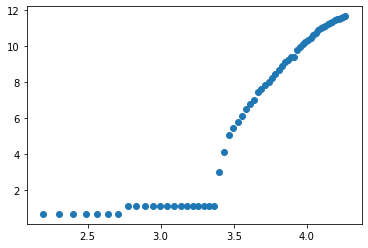

In [35]:
# np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

y = np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())
x = np.arange(np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose()).shape[0])

plt.scatter(np.log(x), np.log(y))
plt.show()

In [36]:
deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Italy'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]



# deathStateDF[deathStateDF.index=='New York'].iloc[:,-1] / byStateDF[byStateDF.index=='New York'].iloc[:,-1]


deathGlobalDF[deathGlobalDF['Country/Region']=='Philippines'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Philippines'].iloc[:,-1]

182    0.040638
Name: 4/2/20, dtype: float64

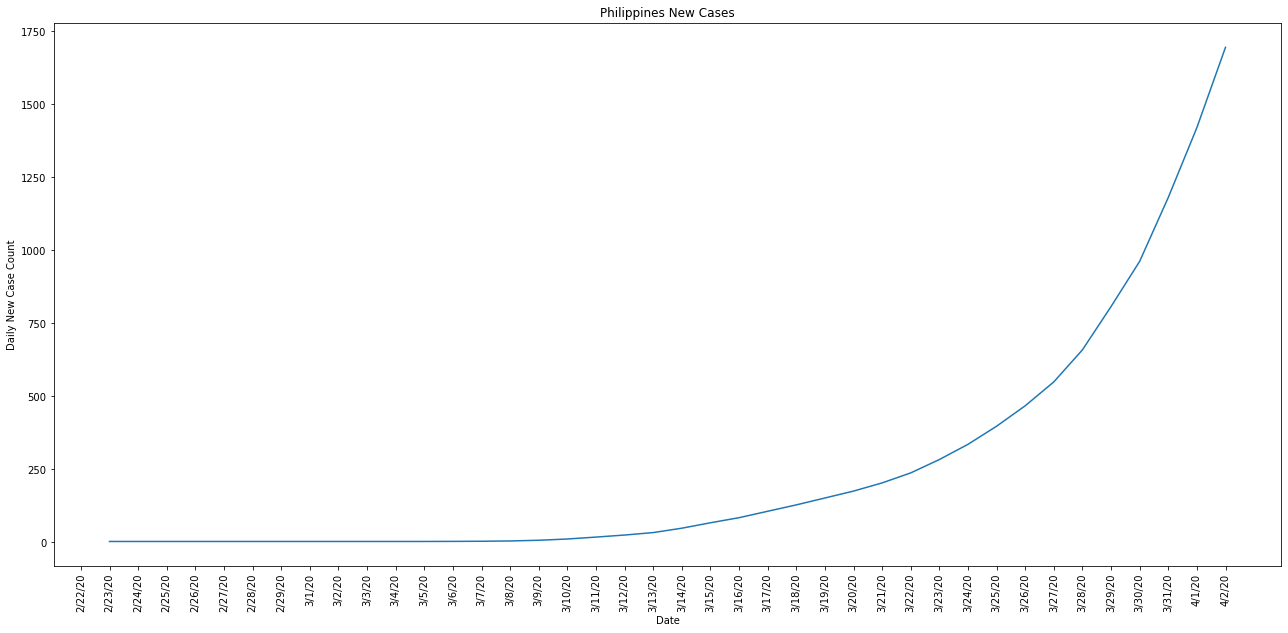

In [37]:


plt.figure(figsize=(22, 10))

# plt.plot(deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean())
plt.plot(globalDF[globalDF['Country/Region']=='Philippines'].iloc[:,30:].transpose().rolling(window=7).mean())

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('Philippines New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
# plt.legend(loc='left')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()

In [38]:
byStateDF[byStateDF.index=='New York'].iloc[:,60:].transpose().diff().diff()

Province_State,New York
3/17/20,NaN
3/18/20,NaN
3/19/20,1206.0
3/20/20,33.0
3/21/20,625.0
3/22/20,749.0
3/23/20,1011.0
3/24/20,-287.0
3/25/20,363.0
3/26/20,1876.0


In [39]:
globalDF[globalDF.index==223]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
223,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,8077,9529,11658,14543,17089,19522,22141,25150,29474,33718
